<a href="https://colab.research.google.com/github/Pelleykiranmai/Data_Analysis_Works_/blob/main/Week8_wed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binomial(n=20, p=0.25) — Distribution Characteristics
--------------------------------------------------
Mean (expected correct answers)       : 5.0000
Variance                              : 3.7500
Standard deviation                    : 1.9365
Mode(s) (most likely # correct)       : (5,)

Exact probability results (theoretical):
--------------------------------------------------
P(X >= 10)       = 0.01386442  = 1.386442%
P(X < 5)         = 0.41484150  = 41.484150%
P(5 <= X <= 8)   = 0.54423333  = 54.423333%
P(X = 10) (info) = 0.00992228  = 0.992228%

Empirical estimates from simulation (n_sim = 20,000):
--------------------------------------------------
Empirical P(X >= 10)     = 0.015400
Empirical P(X < 5)       = 0.411500
Empirical P(5 <= X <= 8) = 0.545950

Interpretation:
--------------------------------------------------
- The mean is 5.00: guessing randomly on 20 questions yields about 5 correct on average.
- The standard deviation (~1.94) shows typical spread around the mean.


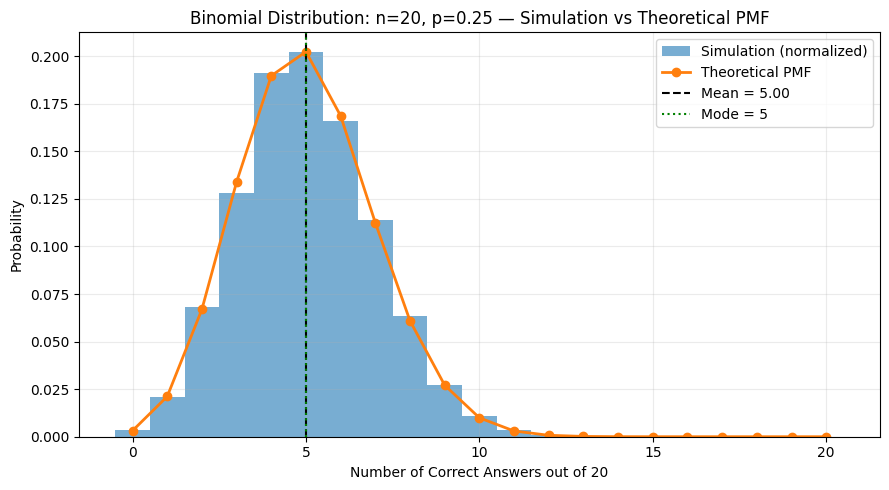

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import comb, floor, erf, sqrt

# Parameters
n = 20
p = 0.25

# ------------- Theoretical characteristics -------------
mean = n * p
variance = n * p * (1 - p)
std_dev = math.sqrt(variance)

# Mode(s) for binomial:
# If (n+1)p is integer, both (m-1) and m are modes where m = (n+1)p
m_val = (n + 1) * p
m_floor = math.floor(m_val)
if abs(m_val - round(m_val)) < 1e-12:  # effectively an integer
    modes = (m_floor - 1, m_floor)
else:
    modes = (m_floor,)

# ------------- PMF and CDF helpers -------------
def binom_pmf(k, n=n, p=p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def binom_cdf(k, n=n, p=p):
    # P(X <= k)
    return sum(binom_pmf(i, n, p) for i in range(0, k + 1))

def binom_tail_greater(k, n=n, p=p):
    # P(X > k) = 1 - P(X <= k)
    return 1 - binom_cdf(k, n, p)

# ------------- Exact probabilities requested -------------
# P(X >= 10)
p_ge_10 = sum(binom_pmf(k, n, p) for k in range(10, n + 1))

# P(X < 5)
p_lt_5 = binom_cdf(4, n, p)

# P(5 <= X <= 8)
p_5_to_8 = sum(binom_pmf(k, n, p) for k in range(5, 9))

# P(X = 10) (not asked but sometimes informative)
p_eq_10 = binom_pmf(10, n, p)

# ------------- Simulation (optional) -------------
SIMULATIONS = 20000
samples = np.random.binomial(n, p, size=SIMULATIONS)

# Empirical checks (quick)
emp_p_ge_10 = np.mean(samples >= 10)
emp_p_lt_5 = np.mean(samples < 5)
emp_p_5_to_8 = np.mean((samples >= 5) & (samples <= 8))

# ------------- Print results -------------
print("Binomial(n=20, p=0.25) — Distribution Characteristics")
print("--------------------------------------------------")
print(f"Mean (expected correct answers)       : {mean:.4f}")
print(f"Variance                              : {variance:.4f}")
print(f"Standard deviation                    : {std_dev:.4f}")
print(f"Mode(s) (most likely # correct)       : {modes}")
print()

print("Exact probability results (theoretical):")
print("--------------------------------------------------")
print(f"P(X >= 10)       = {p_ge_10:.8f}  = {p_ge_10*100:.6f}%")
print(f"P(X < 5)         = {p_lt_5:.8f}  = {p_lt_5*100:.6f}%")
print(f"P(5 <= X <= 8)   = {p_5_to_8:.8f}  = {p_5_to_8*100:.6f}%")
print(f"P(X = 10) (info) = {p_eq_10:.8f}  = {p_eq_10*100:.6f}%")
print()

print("Empirical estimates from simulation (n_sim = {:,}):".format(SIMULATIONS))
print("--------------------------------------------------")
print(f"Empirical P(X >= 10)     = {emp_p_ge_10:.6f}")
print(f"Empirical P(X < 5)       = {emp_p_lt_5:.6f}")
print(f"Empirical P(5 <= X <= 8) = {emp_p_5_to_8:.6f}")
print()

# ------------- Interpretation -------------
print("Interpretation:")
print("--------------------------------------------------")
print(f"- The mean is {mean:.2f}: guessing randomly on 20 questions yields about {mean:.0f} correct on average.")
print("- The standard deviation (~{:.2f}) shows typical spread around the mean.".format(std_dev))
print(f"- Mode(s) {modes} indicate the most probable number(s) of correct answers by pure guessing.")
print()
print("- P(X >= 10) is {:0.6f}% — this is extremely small; getting at least half the questions right purely by guessing is very unlikely.".format(p_ge_10*100))
print("- P(X < 5) is {:0.6f}% — this shows the chance of a rather poor score under guessing.".format(p_lt_5*100))
print("- P(5 <= X <= 8) is {:0.6f}% — this interval contains the most likely outcomes when guessing.".format(p_5_to_8*100))
print()
print("Conclusion: Random guessing (p=0.25) typically produces low scores;")
print("high scores (e.g., >=10/20) are very rare under random guessing.")

# ------------- Plot: theoretical PMF and simulated histogram -------------
k_values = np.arange(0, n + 1)
pmf_values = np.array([binom_pmf(k, n, p) for k in k_values])

plt.figure(figsize=(9,5))
# Histogram of simulated samples (normalized to probability)
plt.hist(samples, bins=np.arange(-0.5, n + 1.5, 1), density=True, alpha=0.6, label='Simulation (normalized)')
# Theoretical PMF
plt.plot(k_values, pmf_values, 'o-', label='Theoretical PMF', linewidth=2)
# Mark mean and mode
plt.axvline(mean, color='k', linestyle='--', label=f"Mean = {mean:.2f}")
for mm in modes:
    plt.axvline(mm, color='green', linestyle=':', label=f"Mode = {mm}")
plt.title("Binomial Distribution: n=20, p=0.25 — Simulation vs Theoretical PMF")
plt.xlabel("Number of Correct Answers out of 20")
plt.ylabel("Probability")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()